<img height=300 align="right" src="https://images-platform.99static.com//wRCI-XeWpnckd9VA8ucNWMgiiuU=/214x0:1006x792/fit-in/500x500/projects-files/53/5363/536385/a09f8f90-db5e-4a1f-b366-2df0272d020b.jpg"/>

<h2 align='center'>Attrition Rate Analysis</h2>

<li>Clear the DataFrame
<li>Attrition Rate Percentage
<li>Create a DataFrame with Attrition = Yes
<li>Comparative Analysis
<li>Pattern of Employees with Attrition = Yes
<li>Decision Tree for Attrition 
<hr color='purple'>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/gabrielalastra/HR_Analytics/main/company_x_dataset_HR.csv')

In [3]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
df=df.drop(columns=['DistanceFromHome','PercentSalaryHike', 'YearsWithCurrManager',
                    'EmployeeCount','EmployeeNumber','Over18', 'StandardHours', 'Education'])

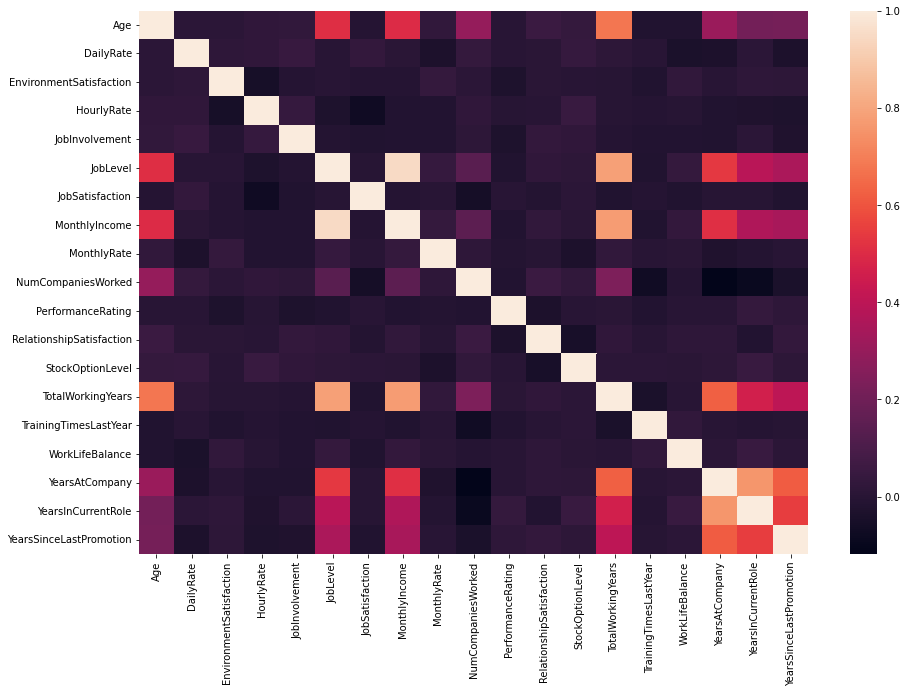

In [5]:
plt.figure(figsize=[15,10])
sns.heatmap(df.corr())

In [7]:
#DF only for Attrition = YES
maskAt = df['Attrition'] == 'Yes'
maskAt = df[maskAt]
maskAt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237 entries, 0 to 1461
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       237 non-null    int64 
 1   Attrition                 237 non-null    object
 2   BusinessTravel            237 non-null    object
 3   DailyRate                 237 non-null    int64 
 4   Department                237 non-null    object
 5   EducationField            237 non-null    object
 6   EnvironmentSatisfaction   237 non-null    int64 
 7   Gender                    237 non-null    object
 8   HourlyRate                237 non-null    int64 
 9   JobInvolvement            237 non-null    int64 
 10  JobLevel                  237 non-null    int64 
 11  JobRole                   237 non-null    object
 12  JobSatisfaction           237 non-null    int64 
 13  MaritalStatus             237 non-null    object
 14  MonthlyIncome            

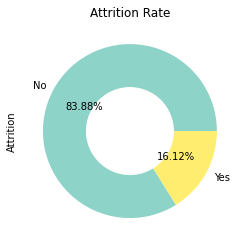

In [6]:
df['Attrition'].value_counts().plot(kind='pie',
                                     colormap='Set3', autopct='%.2f%%')
plt.title('Attrition Rate')
# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

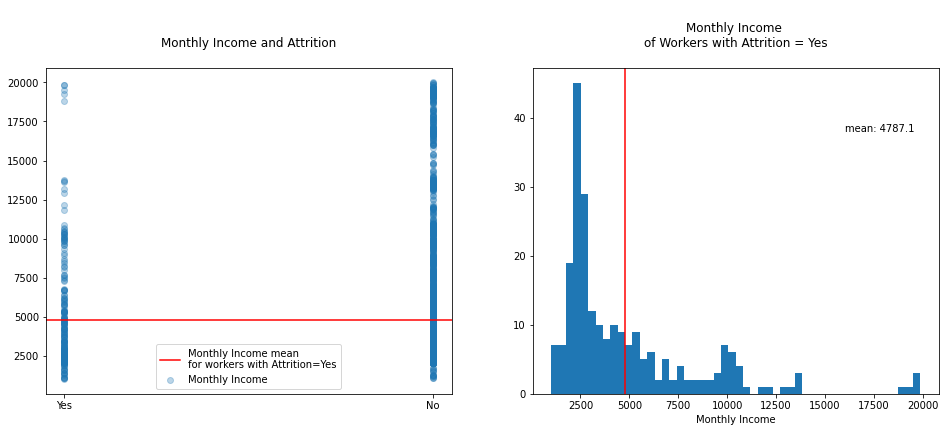

In [76]:
plt.figure(figsize=[16,6])
plt.subplot(1,2,1)
plt.scatter(df['Attrition'], df['MonthlyIncome'], alpha=0.3, label='Monthly Income')
plt.axhline(maskAt['MonthlyIncome'].mean(), color='red', label='Monthly Income mean\nfor workers with Attrition=Yes')
plt.legend()
plt.title('Monthly Income and Attrition\n')

plt.subplot(1,2,2)
plt.hist(maskAt['MonthlyIncome'], bins=50)                                             
plt.axvline(maskAt['MonthlyIncome'].mean(), color='red', label='overall mean')
plt.annotate('mean: {:.1f}'.format(maskAt['MonthlyIncome'].mean()),
             xy=(16000,38))
plt.title('\nMonthly Income \nof Workers with Attrition = Yes\n')
plt.xlabel('Monthly Income')

plt.show()

<h3 align='center'>Comparative Analysis</h3>
<h4 align='center'>Between the original DF and the DF with the Attrition = YES</h4>
<p align='left'>Original DF:<br> Low contrast means higher probability of Attrition <br> High contrast means a probable exception / low relationship to Attrition
<br><br>DF Attrition=Yes:<br> Percentage above 50% indicates a possible pattern</p>
<hr color='purple'>

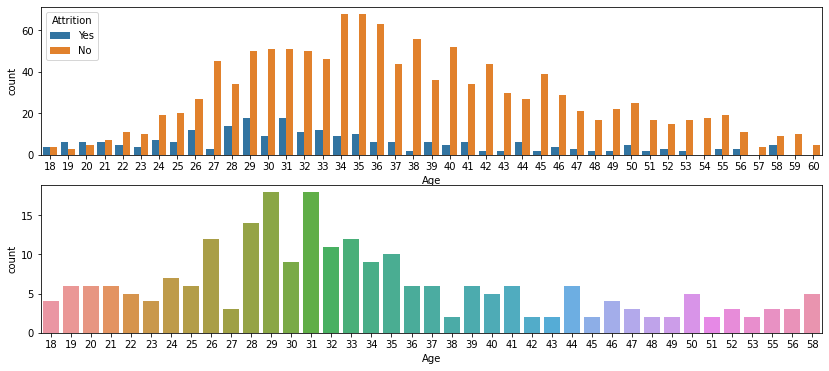

In [20]:
plt.figure(figsize=[14,6])
plt.subplot(2,1,1)
sns.countplot(x='Age', data=df, hue='Attrition')

plt.subplot(2,1,2)
sns.countplot(x='Age', data=maskAt)

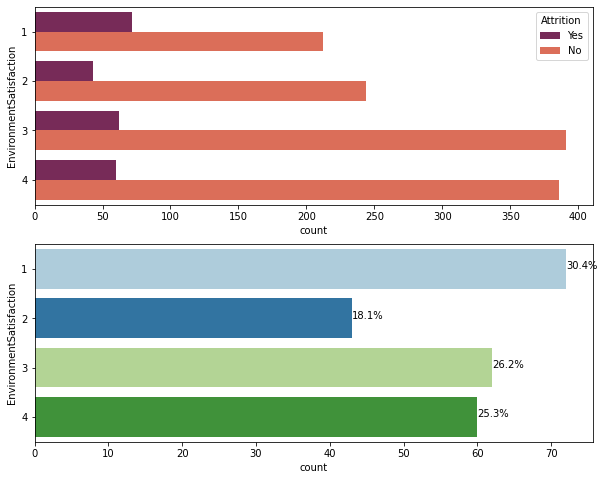

In [58]:
plt.figure(figsize=[10,8])

plt.subplot(2,1,1)
sns.countplot(y='EnvironmentSatisfaction', data=df, hue='Attrition', palette='rocket')

plt.subplot(2,1,2)
ax = sns.countplot(y='EnvironmentSatisfaction', data=maskAt, palette='Paired')

total = len(maskAt['EnvironmentSatisfaction'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
plt.show()

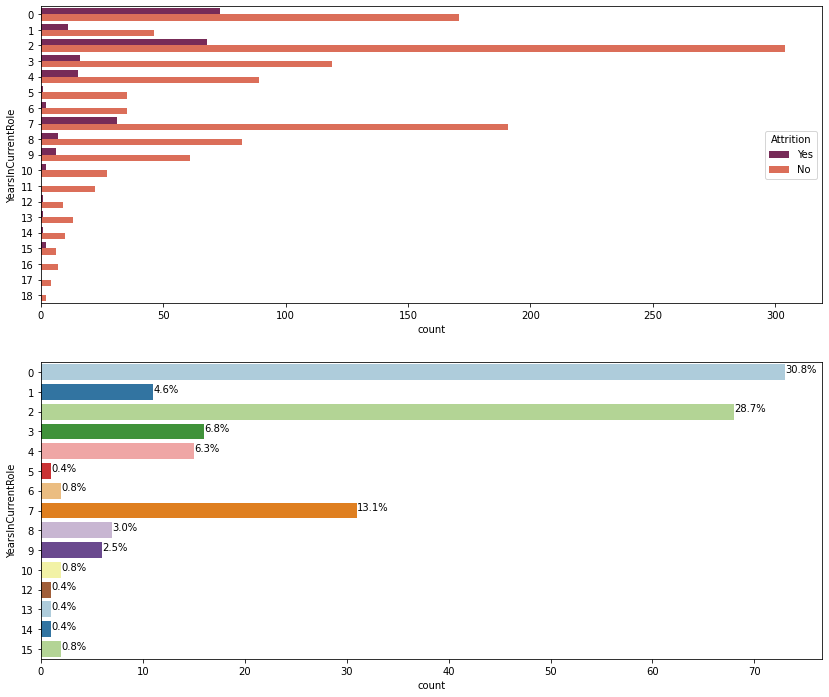

In [57]:
plt.figure(figsize=[14,12])

plt.subplot(2,1,1)
ax = sns.countplot(y='YearsInCurrentRole', data=df, hue='Attrition', palette='rocket')

plt.subplot(2,1,2)
ax = sns.countplot(y='YearsInCurrentRole', data=maskAt, palette='Paired')

total = len(maskAt['YearsInCurrentRole'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
plt.show()

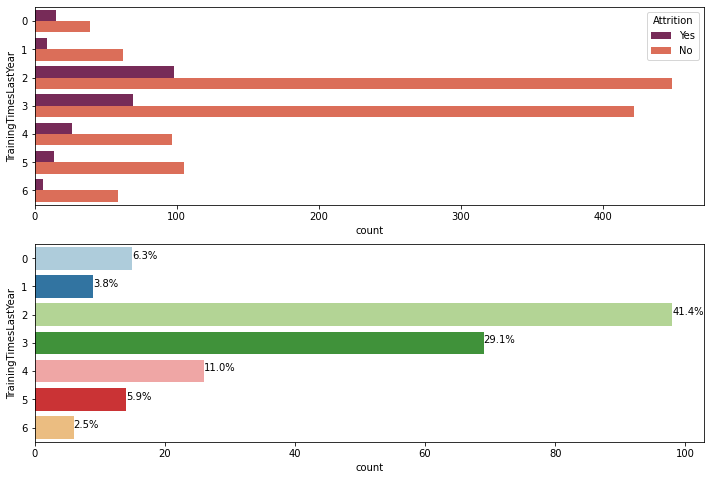

In [59]:
plt.figure(figsize=[12,8])
plt.subplot(2,1,1)
ax = sns.countplot(y='TrainingTimesLastYear', data=df, hue='Attrition', palette='rocket')

plt.subplot(2,1,2)
ax = sns.countplot(y='TrainingTimesLastYear', data=maskAt, palette='Paired')

total = len(maskAt['TrainingTimesLastYear'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
plt.show()

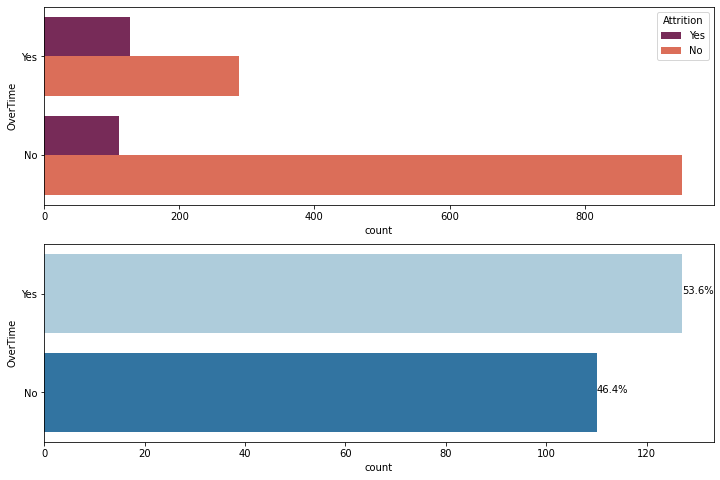

In [60]:
plt.figure(figsize=[12,8])
plt.subplot(2,1,1)
ax = sns.countplot(y='OverTime', data=df, hue='Attrition', palette='rocket')

plt.subplot(2,1,2)
ax = sns.countplot(y='OverTime', data=maskAt, palette='Paired')

total = len(maskAt['OverTime'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
plt.show()

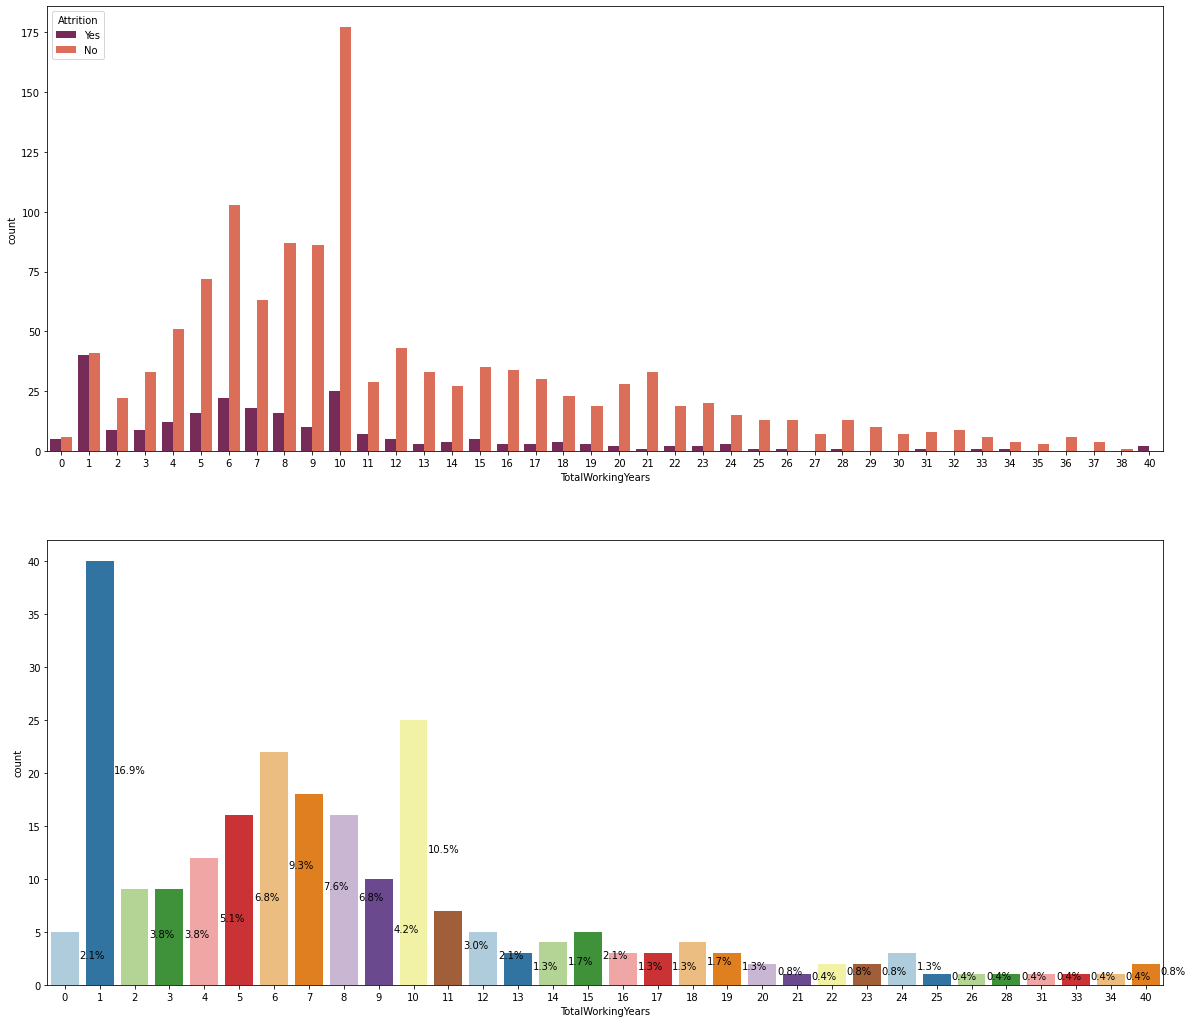

In [69]:
plt.figure(figsize=[20,18])
plt.subplot(2,1,1)
ax = sns.countplot(x='TotalWorkingYears', data=df, hue='Attrition', palette='rocket')

plt.subplot(2,1,2)
ax = sns.countplot(x='TotalWorkingYears', data=maskAt, palette='Paired')

total = len(maskAt['TotalWorkingYears'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        y = p.get_y() + p.get_height()/2
        x = p.get_x() + p.get_width() + 0.02
        ax.annotate(percentage, (x, y))
plt.show()

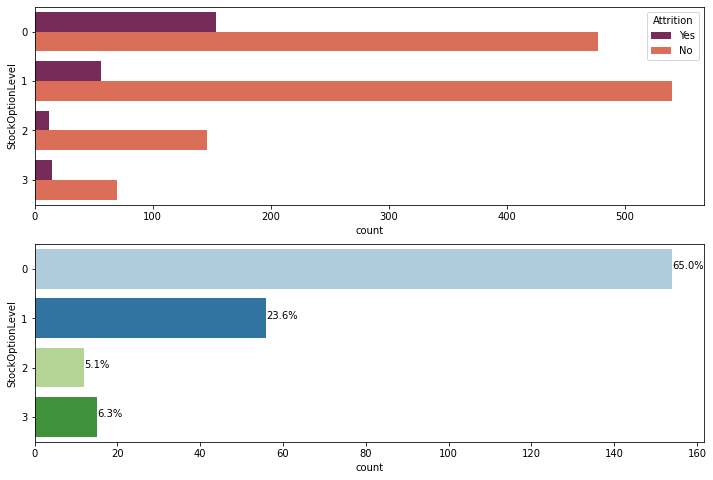

In [70]:
plt.figure(figsize=[12,8])
plt.subplot(2,1,1)
ax = sns.countplot(y='StockOptionLevel', data=df, hue='Attrition', palette='rocket')

plt.subplot(2,1,2)
ax = sns.countplot(y='StockOptionLevel', data=maskAt, palette='Paired')

total = len(maskAt['StockOptionLevel'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
plt.show()

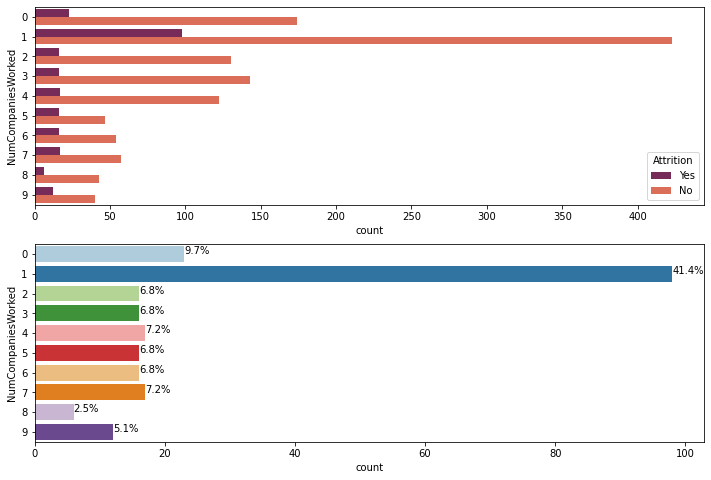

In [72]:
plt.figure(figsize=[12,8])
plt.subplot(2,1,1)
ax = sns.countplot(y='NumCompaniesWorked', data=df, hue='Attrition', palette='rocket')

plt.subplot(2,1,2)
ax = sns.countplot(y='NumCompaniesWorked', data=maskAt, palette='Paired')

total = len(maskAt['NumCompaniesWorked'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
plt.show()


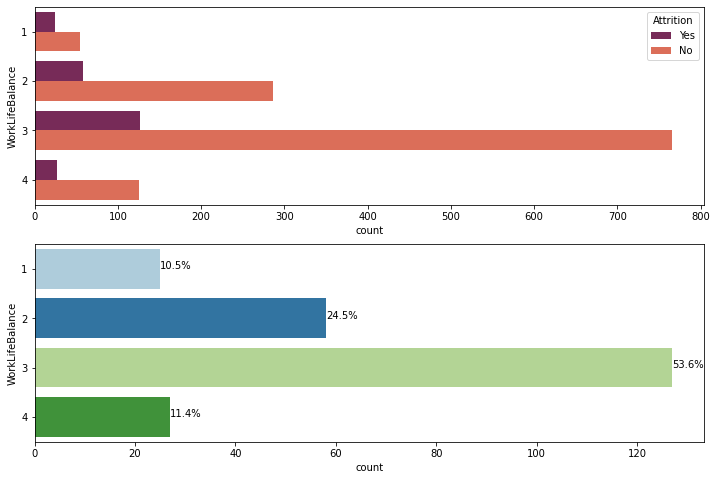

In [73]:
plt.figure(figsize=[12,8])
plt.subplot(2,1,1)
ax = sns.countplot(y='WorkLifeBalance', data=df, hue='Attrition', palette='rocket')

plt.subplot(2,1,2)
ax = sns.countplot(y='WorkLifeBalance', data=maskAt, palette='Paired')

total = len(maskAt['WorkLifeBalance'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
plt.show()


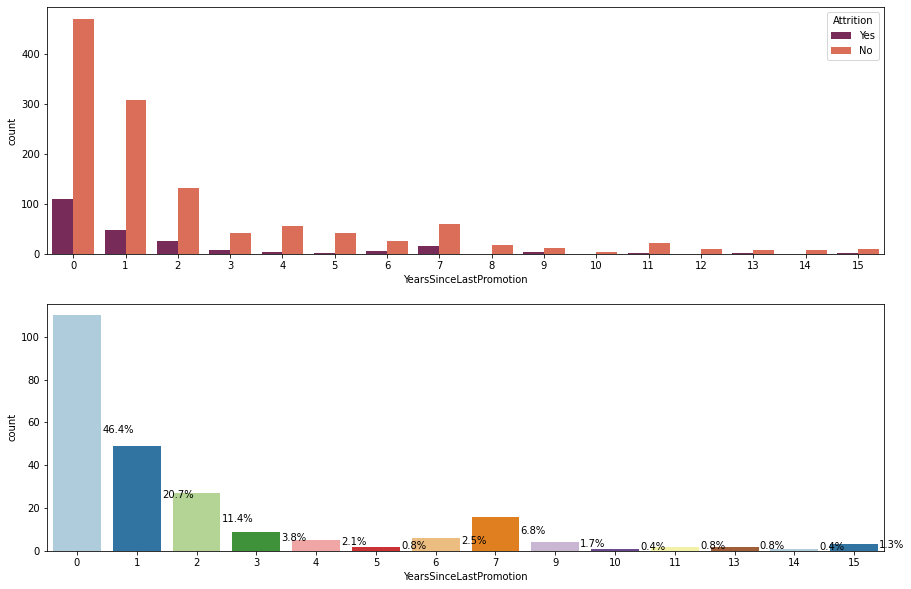

In [86]:
plt.figure(figsize=[15,10])
plt.subplot(2,1,1)
ax = sns.countplot(x='YearsSinceLastPromotion', data=df, hue='Attrition', palette='rocket')

plt.subplot(2,1,2)
ax = sns.countplot(x='YearsSinceLastPromotion', data=maskAt, palette='Paired')

total = len(maskAt['YearsSinceLastPromotion'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        y = p.get_y() + p.get_height()/2
        x = p.get_x() + p.get_width() + 0.02
        ax.annotate(percentage, (x, y))
plt.show()


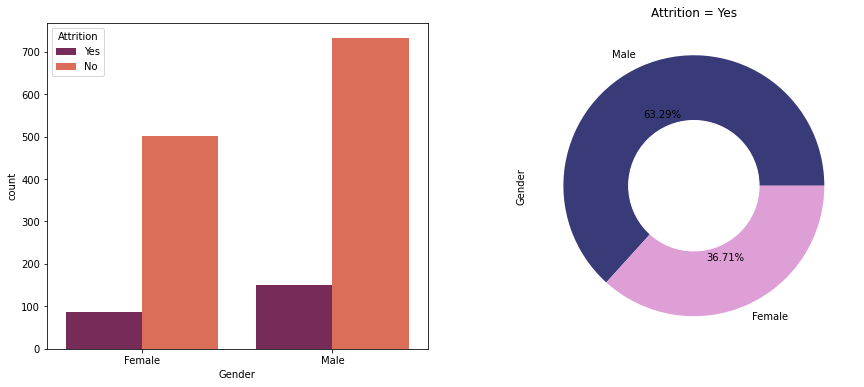

In [88]:
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
ax = sns.countplot(x='Gender', data=df, hue='Attrition', palette='rocket')

plt.subplot(1,2,2)
maskAt['Gender'].value_counts().plot(kind='pie',
                                     colormap='tab20b', autopct='%.2f%%')
plt.title('Attrition = Yes')
# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()


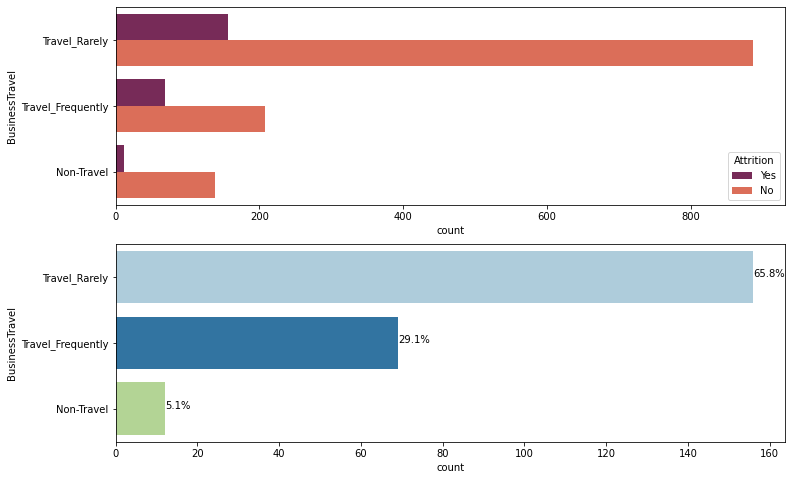

In [89]:
plt.figure(figsize=[12,8])
plt.subplot(2,1,1)
ax = sns.countplot(y='BusinessTravel', data=df, hue='Attrition', palette='rocket')

plt.subplot(2,1,2)
ax = sns.countplot(y='BusinessTravel', data=maskAt, palette='Paired')

total = len(maskAt['BusinessTravel'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
plt.show()

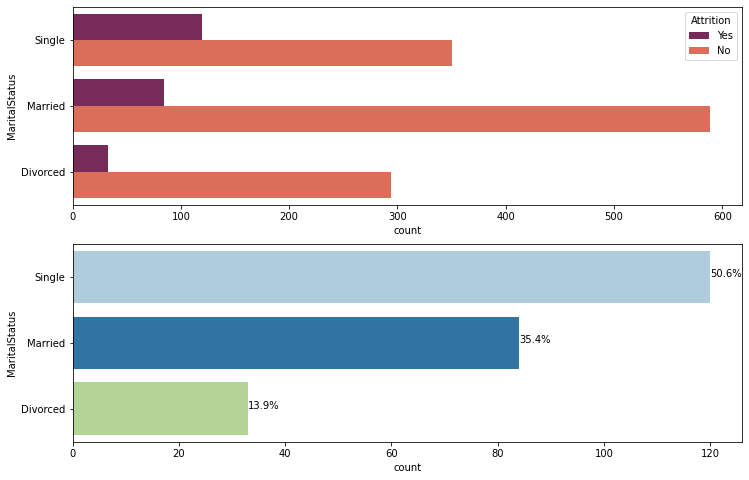

In [90]:
plt.figure(figsize=[12,8])
plt.subplot(2,1,1)
ax = sns.countplot(y='MaritalStatus', data=df, hue='Attrition', palette='rocket')

plt.subplot(2,1,2)
ax = sns.countplot(y='MaritalStatus', data=maskAt, palette='Paired')

total = len(maskAt['MaritalStatus'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
plt.show()

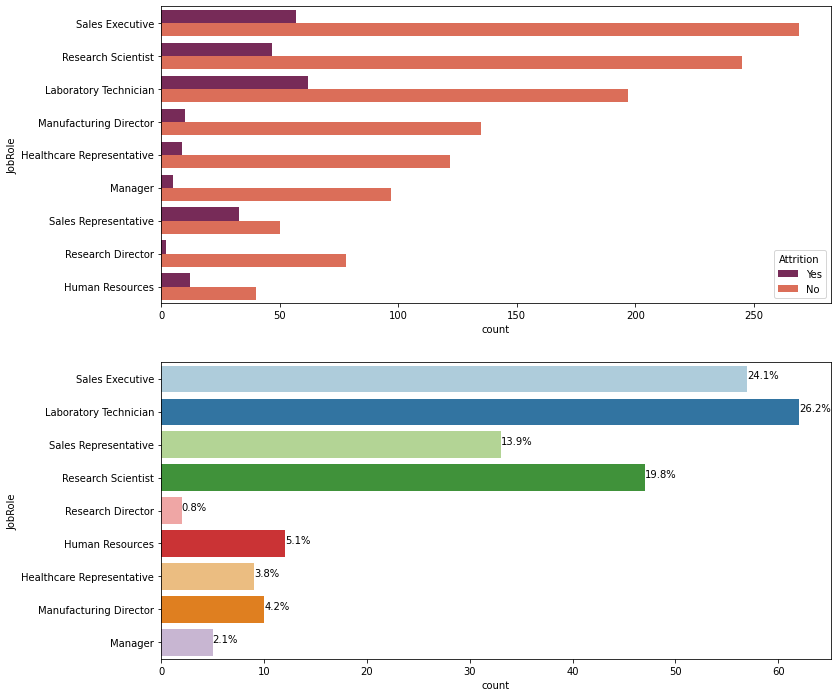

In [94]:
plt.figure(figsize=[12,12])
plt.subplot(2,1,1)
ax = sns.countplot(y='JobRole', data=df, hue='Attrition', palette='rocket')

plt.subplot(2,1,2)
ax = sns.countplot(y='JobRole', data=maskAt, palette='Paired')

total = len(maskAt['JobRole'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
plt.show()

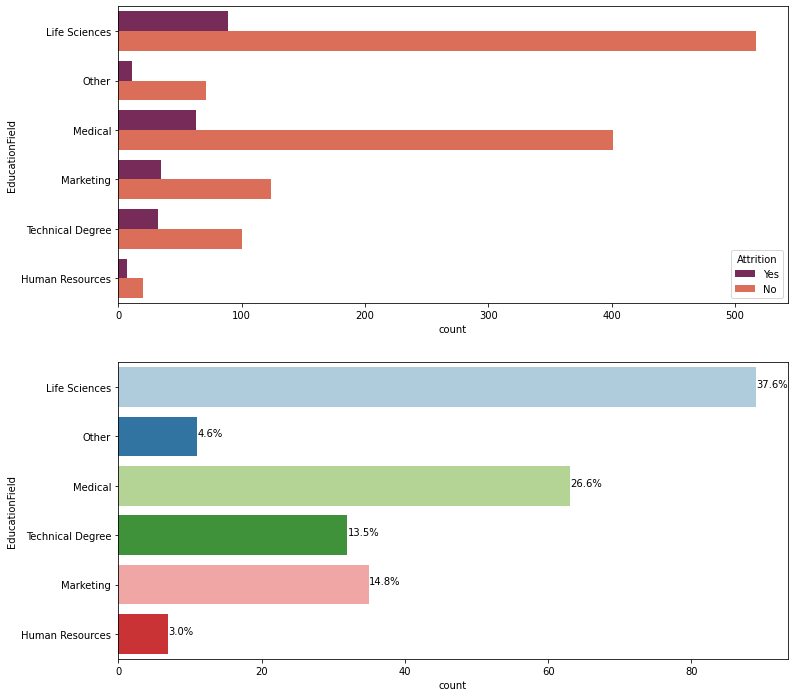

In [95]:
plt.figure(figsize=[12,12])
plt.subplot(2,1,1)
ax = sns.countplot(y='EducationField', data=df, hue='Attrition', palette='rocket')

plt.subplot(2,1,2)
ax = sns.countplot(y='EducationField', data=maskAt, palette='Paired')

total = len(maskAt['EducationField'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
plt.show()

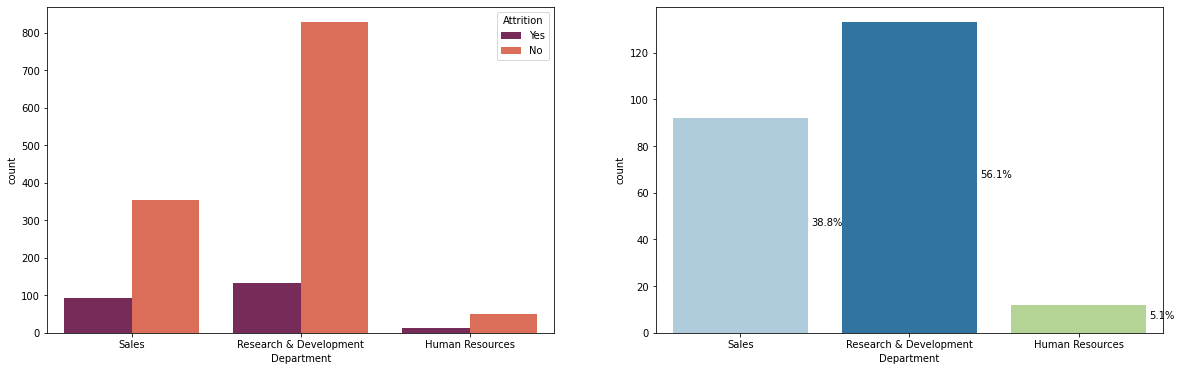

In [99]:
plt.figure(figsize=[20,6])
plt.subplot(1,2,1)
ax = sns.countplot(x='Department', data=df, hue='Attrition', palette='rocket')

plt.subplot(1,2,2)
ax = sns.countplot(x='Department', data=maskAt, palette='Paired')

total = len(maskAt['Department'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        y = p.get_y() + p.get_height()/2
        x = p.get_x() + p.get_width() + 0.02
        ax.annotate(percentage, (x, y))
plt.show()

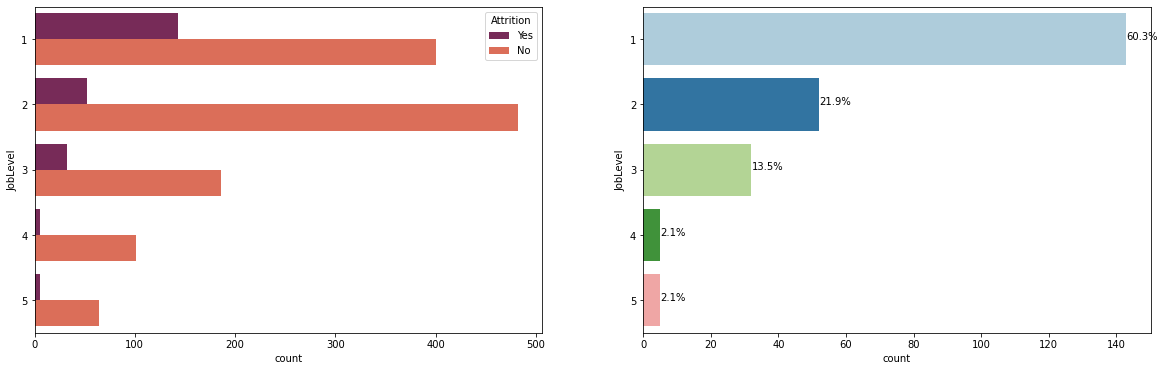

In [103]:
plt.figure(figsize=[20,6])
plt.subplot(1,2,1)
ax = sns.countplot(y='JobLevel', data=df, hue='Attrition', palette='rocket')

plt.subplot(1,2,2)
ax = sns.countplot(y='JobLevel', data=maskAt, palette='Paired')

total = len(maskAt['JobLevel'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
plt.show()

In [115]:
maskAt['DailyRate'].value_counts()

1475    2
289     2
350     2
303     2
575     2
       ..
725     1
1146    1
1243    1
805     1
410     1
Name: DailyRate, Length: 219, dtype: int64

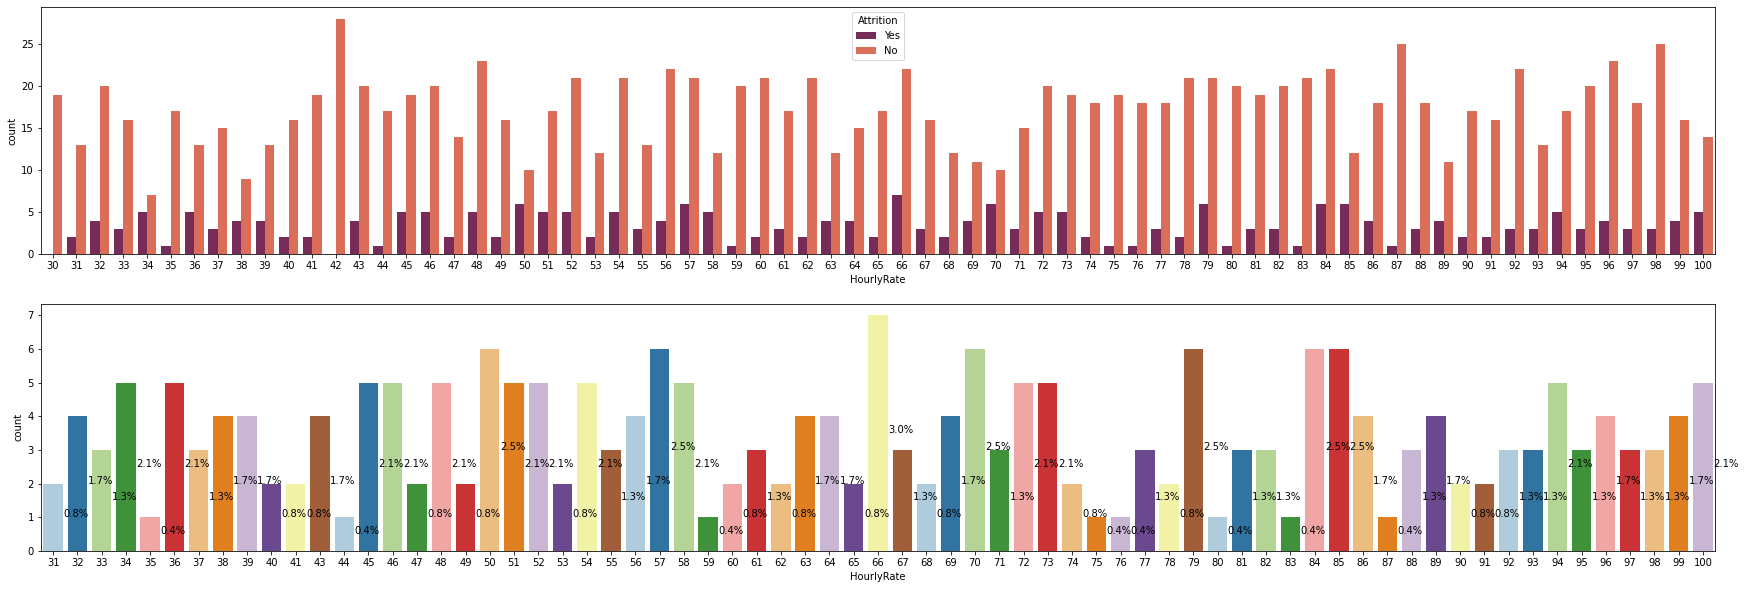

In [120]:
plt.figure(figsize=[30,10])
plt.subplot(2,1,1)
ax = sns.countplot(x='HourlyRate', data=df, hue='Attrition', palette='rocket')

plt.subplot(2,1,2)
ax = sns.countplot(x='HourlyRate', data=maskAt, palette='Paired')

total = len(maskAt['HourlyRate'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        y = p.get_y() + p.get_height()/2
        x = p.get_x() + p.get_width() + 0.02
        ax.annotate(percentage, (x, y))
plt.show()


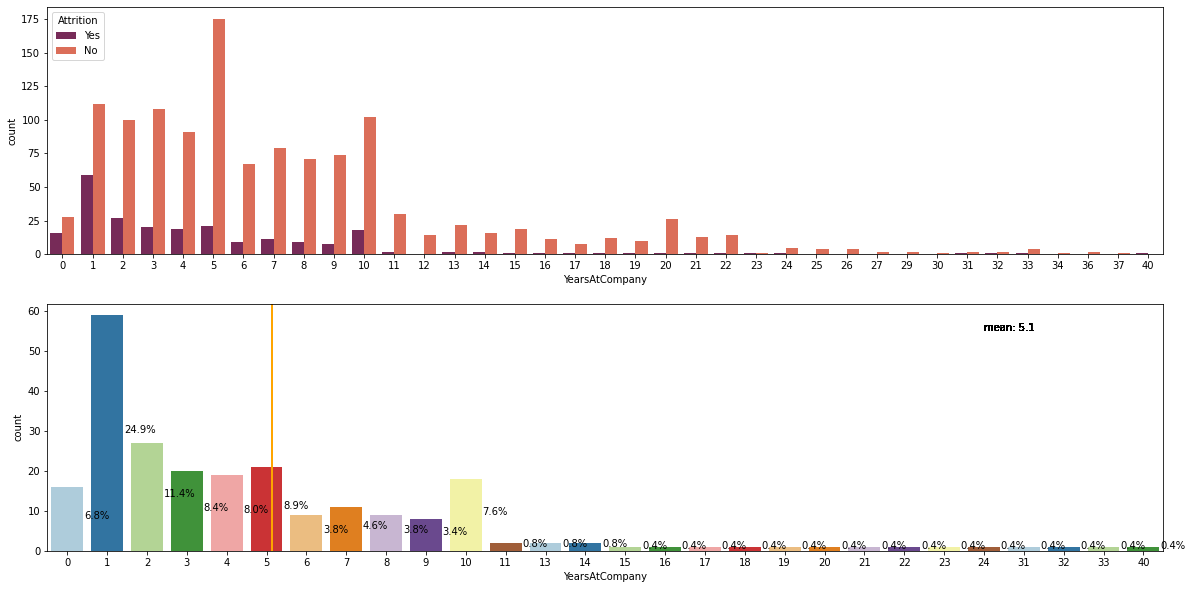

In [144]:
plt.figure(figsize=[20,10])
plt.subplot(2,1,1)
ax = sns.countplot(x='YearsAtCompany', data=df, hue='Attrition', palette='rocket')

plt.subplot(2,1,2)
ax = sns.countplot(x='YearsAtCompany', data=maskAt, palette='Paired')


total = len(maskAt['YearsAtCompany'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        y = p.get_y() + p.get_height()/2
        x = p.get_x() + p.get_width() + 0.02
        ax.axvline(maskAt['YearsAtCompany'].mean(),color='orange')
        ax.annotate('mean: {:.1f}'.format(maskAt['YearsAtCompany'].mean()), xy=(23,55))
        ax.annotate(percentage, (x, y))


plt.show()


<h3 align='center'>The possible pattern<br> of Employees with Attrition = Yes</h3>
<hr color='purple'>

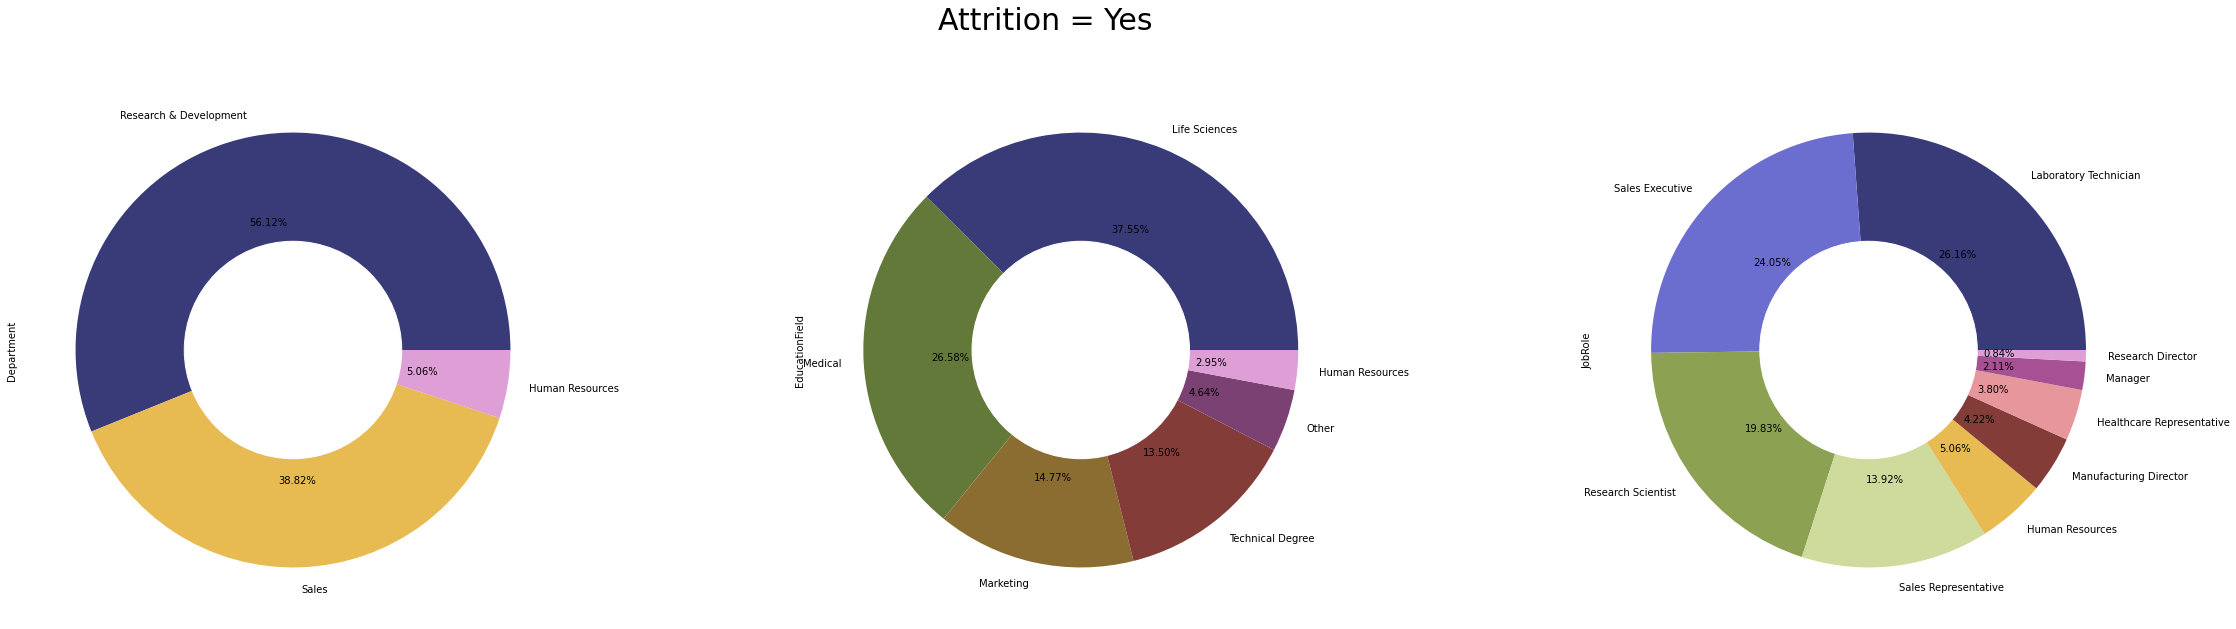

In [34]:
plt.figure(figsize=[30,10])
plt.suptitle('Attrition = Yes', size=30)

plt.subplot(1,3,1)
maskAt['Department'].value_counts().plot(kind='pie',
                                     colormap='tab20b',
                                      autopct='%.2f%%')
# add a circle
my_circle=plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.subplot(1,3,2)
maskAt['EducationField'].value_counts().plot(kind='pie',
                                     colormap='tab20b',
                                      autopct='%.2f%%')
# add a circle
my_circle=plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.subplot(1,3,3)
maskAt['JobRole'].value_counts().plot(kind='pie',
                                     colormap='tab20b',
                                      autopct='%.2f%%')
# add a circle
my_circle=plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)


plt.show()

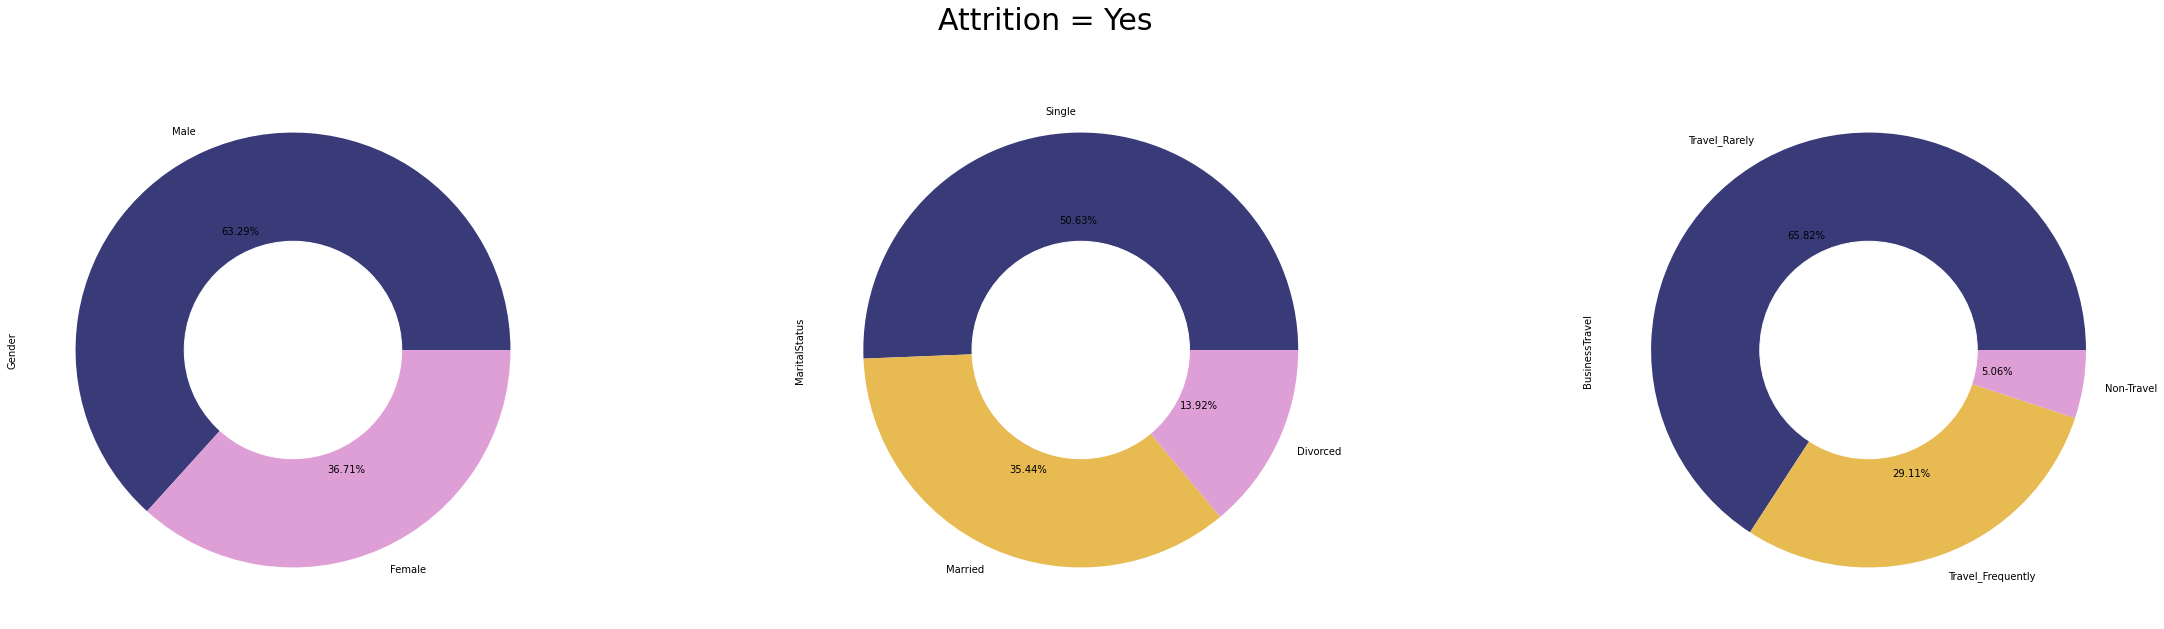

In [35]:
plt.figure(figsize=[40,10])
plt.suptitle('Attrition = Yes', size=30)

plt.subplot(1,3,1)
maskAt['Gender'].value_counts().plot(kind='pie',
                                     colormap='tab20b',
                                      autopct='%.2f%%')
# add a circle
my_circle=plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.subplot(1,3,2)
maskAt['MaritalStatus'].value_counts().plot(kind='pie',
                                     colormap='tab20b',
                                      autopct='%.2f%%')
# add a circle
my_circle=plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.subplot(1,3,3)
maskAt['BusinessTravel'].value_counts().plot(kind='pie',
                                     colormap='tab20b',
                                      autopct='%.2f%%')
# add a circle
my_circle=plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)


plt.show()

<h3 align='center'>Decision Tree</h3>
<hr color='purple'> 

In [36]:
df['Attrition'] = df['Attrition'].replace({'Yes' : 1,
                                           'No' : 0})

In [37]:
df2=df.copy()

In [38]:
df2=df2.drop(columns=['StockOptionLevel']) #using with and without StockOptionLevel

<h5>Transforming to Numerical</h5>

In [39]:
df3 = pd.get_dummies(df2,columns=['EducationField', 'BusinessTravel', 'Department','Gender', 'JobRole', 'MaritalStatus', 'OverTime'])

In [40]:
df3.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1,1102,1,2,1,1,2,94,3,...,0,0,0,1,0,0,0,1,0,1
1,49,0,279,8,1,1,2,3,61,2,...,0,0,1,0,0,0,1,0,1,0
2,37,1,1373,2,2,1,4,4,92,2,...,0,0,0,0,0,0,0,1,0,1
3,33,0,1392,3,4,1,5,4,56,3,...,0,0,1,0,0,0,1,0,0,1
4,27,0,591,2,1,1,7,1,40,3,...,0,0,0,0,0,0,1,0,1,0


In [41]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 53 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int64
 2   DailyRate                          1470 non-null   int64
 3   DistanceFromHome                   1470 non-null   int64
 4   Education                          1470 non-null   int64
 5   EmployeeCount                      1470 non-null   int64
 6   EmployeeNumber                     1470 non-null   int64
 7   EnvironmentSatisfaction            1470 non-null   int64
 8   HourlyRate                         1470 non-null   int64
 9   JobInvolvement                     1470 non-null   int64
 10  JobLevel                           1470 non-null   int64
 11  JobSatisfaction                    1470 non-null   int64
 12  MonthlyIncome       

In [42]:
from sklearn.preprocessing import MinMaxScaler

scale_vars = ['DistanceFromHome','Education','EnvironmentSatisfaction', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance',   ]
scaler = MinMaxScaler()

df3[scale_vars] = scaler.fit_transform(df3[scale_vars])
df3.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1,1102,0.000000,0.25,1,1,0.333333,94,3,...,0,0,0,1,0,0,0,1,0,1
1,49,0,279,0.250000,0.00,1,2,0.666667,61,2,...,0,0,1,0,0,0,1,0,1,0
2,37,1,1373,0.035714,0.25,1,4,1.000000,92,2,...,0,0,0,0,0,0,0,1,0,1
3,33,0,1392,0.071429,0.75,1,5,1.000000,56,3,...,0,0,1,0,0,0,1,0,0,1
4,27,0,591,0.035714,0.00,1,7,0.000000,40,3,...,0,0,0,0,0,0,1,0,1,0


<h5 align='center'>Decision Tree</h5>

In [43]:
x = df3.drop('Attrition', axis=1).values #input features attributes
y = df3['Attrition'].values #target selector
print('x shape is: {}'.format(np.shape(x))) 
print('y shape is: {}'.format(np.shape(y)))

x shape is: (1470, 52)
y shape is: (1470,)


In [44]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.9,
                                                    test_size=0.1, random_state=0)


In [45]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

dt = DecisionTreeClassifier(criterion='entropy',
                            max_depth=3, random_state=1) #maxdepth is the tree levels
dt.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1)

In [46]:
import graphviz 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz


dot_data = tree.export_graphviz(dt, out_file=None, 
    feature_names=df3.drop('Attrition', axis=1).columns,    
    class_names=df3['Attrition'].unique().astype(str),  
    filled=True, rounded=True,  
    special_characters=True)
graph = graphviz.Source(dot_data)
graph
graph.render('decision_tree.svg', format='svg', directory='output').replace('\\', '/')

#Class 0 == Attrition NO == Blue
#Class 1 == Attrition YES == Levels till orange

'output/decision_tree.svg.svg'

In [47]:
for i, column in enumerate(df3.drop('Attrition', axis=1)):
    print('Importance of feature {}:, {:.3f}'.format(column, dt.feature_importances_[i]))
    
    fi = pd.DataFrame({'Variable': [column],
                       'Feature Importance Score': [dt.feature_importances_[i]]})
    
    try: #the others values
        final_fi = pd.concat([final_fi,fi], ignore_index = True)
    except: #the first value
        final_fi = fi
        
        
# Ordering the data
final_fi = final_fi.sort_values('Feature Importance Score', ascending = False).reset_index()            
final_fi

Importance of feature Age:, 0.131
Importance of feature DailyRate:, 0.000
Importance of feature DistanceFromHome:, 0.000
Importance of feature Education:, 0.000
Importance of feature EmployeeCount:, 0.000
Importance of feature EmployeeNumber:, 0.000
Importance of feature EnvironmentSatisfaction:, 0.074
Importance of feature HourlyRate:, 0.000
Importance of feature JobInvolvement:, 0.000
Importance of feature JobLevel:, 0.000
Importance of feature JobSatisfaction:, 0.000
Importance of feature MonthlyIncome:, 0.240
Importance of feature MonthlyRate:, 0.000
Importance of feature NumCompaniesWorked:, 0.000
Importance of feature PercentSalaryHike:, 0.000
Importance of feature PerformanceRating:, 0.000
Importance of feature RelationshipSatisfaction:, 0.000
Importance of feature TotalWorkingYears:, 0.165
Importance of feature TrainingTimesLastYear:, 0.000
Importance of feature WorkLifeBalance:, 0.000
Importance of feature YearsAtCompany:, 0.000
Importance of feature YearsInCurrentRole:, 0.000

,index,Variable,Feature Importance Score
0,50,OverTime_No,0.286946
1,11,MonthlyIncome,0.240434
2,17,TotalWorkingYears,0.165192
3,0,Age,0.131126
4,49,MaritalStatus_Single,0.102456
5,6,EnvironmentSatisfaction,0.073846
6,38,JobRole_Healthcare Representative,0.000000
7,30,BusinessTravel_Non-Travel,0.000000
8,31,BusinessTravel_Travel_Frequently,0.000000
9,32,BusinessTravel_Travel_Rarely,0.000000


<h4 align='center'>Model Accuracy</h4>

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score


In [54]:
print("Training Accuracy is: ", dt.score(x_train, y_train)) #evaluated the model on the same dataset that it was trained for
print("\n\nTesting Accuracy is: ", dt.score(x_test, y_test)) #evaluate the model for new datas.

Training Accuracy is:  0.8594104308390023


Testing Accuracy is:  0.8503401360544217


<h5>Confusion Matrix</h5>

In [55]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, 
                    vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [56]:
y_prediction = dt.predict(x_train)


In [57]:
confusion_matrix(y_train, y_prediction)


array([[1086,   26],
       [ 160,   51]])

<Figure size 1800x720 with 0 Axes>

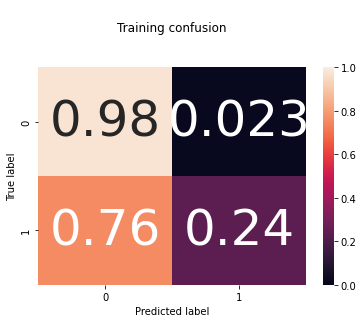

In [58]:
# Plotting Confusion Matrix
plt.figure(figsize=[25,10])
cm = confusion_matrix(y_train, y_prediction)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=dt.classes_,
                      title='\nTraining confusion\n\n')

#98% good on predict Attrition = No, and 25% of certain about Attrition = Yes.